<a href="https://colab.research.google.com/github/Erofili-K/BI-BA/blob/main/BI_Ask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1η εργασία Επιχειρησιακής Έρευνας & Ευφυΐας

Όνομα: Ερωφίλη Κώνστα

ΑΕΜ: 3618
<br>
<br>

**Άσκηση 1:**
<br>
Πρώτα, κατεβάζω τα δεδομένα (dataset) και τα φορτώνω σε σε ένα Pandas DataFrame. Στην συνέχεια χρησιμοποιώ την describe() για να δω κάποιες μετρικές και το πώς είναι κατανεμημένα τα δεδομένα μέσα στο dataset.
<br>
Η μεταβλητή "ds" περιέχει το dataset της εργασίας.

In [2]:
import pandas as pd 
import numpy as np

#dataset
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

ds = pd.read_csv("/content/GroceriesInitial.csv", delimiter=',', header='infer')
print(f"This dataset has {ds.shape} rows and collumns")
ds.head()


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 32.5MB/s]
This dataset has (7536, 35) rows and collumns


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ds.describe()


,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Το πρώτο πράγμα πριν αρχίσω την επεξεργασία των δεδομένων και προχωρήσω στις ασκήσεις είναι να κάνω οπτικοποίηση των δεδομένων.
<br>
Για αυτό χρησιμοποιώ τις βιβλιοθήκες matplotlib.pyplot & seaborn 
<br>
1. Μια οπτικοποίηση που μπορουμε να κάνουμε είναι ένα ιστόγραμμα που να δείχνει **το πλήθος των συναλλαγών ανά ημέρα**. Για αυτό, πρώτα μετατρέπουμε την στήλη recency_days ,που περιέχει έναν int αριθμό, σε format ημερομηνίας και ώρας.
Επειδή, δεν έχουμε την αρχική ηερομηνία η συνάρτηση pd.to_datetime() χρησιμοποιεί μια αυθαίρετηημερομηνία. Αυτό δεν παίζει ρόλο στην οπτικοποίηση των δεδομένων, γιατί η στήλη recency_days αντιπροσωπεύει το πλήθος ημερών που πέρασαν από τη μέρα της συναλλαγής. Οπότε για παράδειγμα αν σε δυο συναλλαγές το recency_day είναι 5 τότε και οι δυο αυτές συναλλαγές πραγματοποιήθηκαν την ίδια μέρα, άρα στο ιστόγραμμα θα βρίσκονται στην ίδια "ράβδο".
<br> 
Τέλος, μπορούμε να υπλογίσουμε με τον ίδιο τρόπο τον μέσο όρο των συναλλαγών κάθε μέρα.  

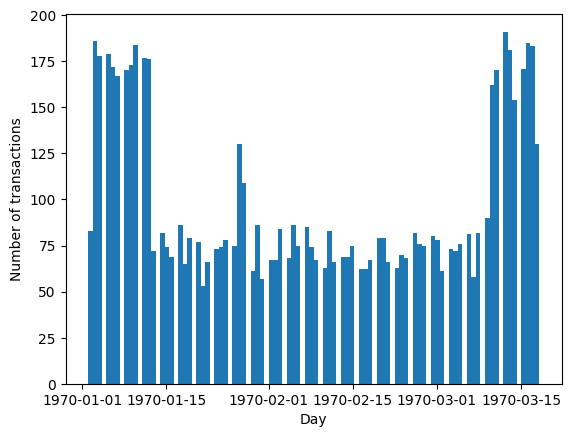

Mean number of transactions each day: 4.92502639859593 or rounded up: 5


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# recency_days -> datetime format
ds['recency_days'] = pd.to_datetime(ds['recency_days'], unit='d')
# ιστογραμμα για ρον αριθμο των συναλλαγων καθε μερα
plt.hist(ds['recency_days'], bins=100)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show()
# μο συναλλαγες ανά ημέρα
daily_transactions = ds.groupby(ds['recency_days'].dt.date)['basket_value'].mean()
print(f"Mean number of transactions each day: {daily_transactions.mean()} or rounded up: {math.ceil(daily_transactions.mean())}")

2. Μια δεύτερη αρχική οπτικοποίηση των δεδομένων που μπορεί να γίνει με το dataset είναι να δημιουργήσουμε ένα ιστογραμμα που δείχνει πόσα προϊόντα αγοράζονται συνήθως ανά συναλλαγή. Αρχικά μετράμε πόσες στήλες απο την item_1 - item_32 έχουν τιμή και δεν είναι κενές και φτιάχνουμε το ιστόγραμμα. 

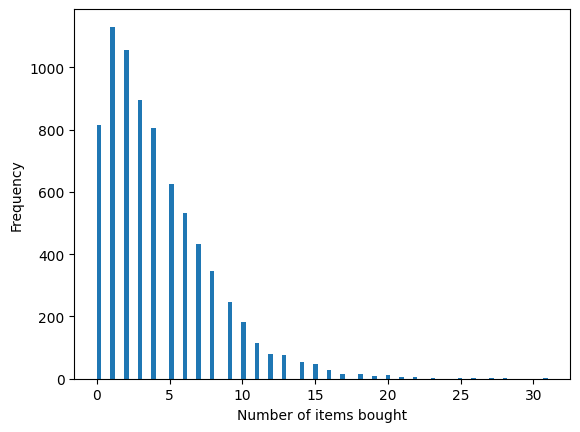

In [5]:
# πληθος προιοντων ανα συνναλλαγη
c=[]
for i, row in ds.iterrows():
    count = row.iloc[4:].count()
    #print(f"id: {row['id']} {count} items bought")
    c.append(count)

plt.hist(c, bins=100)
plt.xlabel("Number of items bought")
plt.ylabel("Frequency")
plt.show()

Στην συνέχεια πρέπει να κάνουμε μετασχηματισμό των εδομένων σε δυαδική μορφή συναλλαγών.
<br> 
Πρώτα, δημιουργούμε μια λίστα lst  που περιέχει όλα τα ονόματα των προιόντων που αγοράζουν οι καταναλωτές, χωρίς τις nan τιμές και χωρίς διπλότυπα.
<br>  

In [6]:
import numpy as np
#κραταμε μονο τις τιμες απο την 3η στηλη κ μετα
lst = ds.iloc[:, 3:].values.flatten().tolist()
#print(lst)
#σβηνουμε τα nan
lst = [x for x in lst if not pd.isna(x)]
#μοναδικα στοιχια(οχι διπλοτυπα)
lst = list(set(lst))
print(lst)
#print(len(lst))
#sort A->z
lst.sort()
print(lst)
print(len(lst))

['butter milk', 'other vegetables', 'margarine', 'candles', 'pasta', 'softener', 'artif. sweetener', 'turkey', 'frozen meals', 'spices', 'liqueur', 'cookware', 'soft cheese', 'sugar', 'cat food', 'rum', 'frozen vegetables', 'dish cleaner', 'baby cosmetics', 'domestic eggs', 'rolls/buns', 'brown bread', 'sliced cheese', 'whipped/sour cream', 'soap', 'potato products', 'pickled vegetables', 'jam', 'packaged fruit/vegetables', 'toilet cleaner', 'curd cheese', 'nuts/prunes', 'mustard', 'tidbits', 'chocolate marshmallow', 'vinegar', 'herbs', 'specialty chocolate', 'beverages', 'sweet spreads', 'photo/film', 'waffles', 'kitchen towels', 'processed cheese', 'chicken', 'cake bar', 'canned fish', 'house keeping products', 'napkins', 'pet care', 'dental care', 'candy', 'pork', 'grapes', 'salty snack', 'baby food', 'snack products', 'hair spray', 'UHT-milk', 'zwieback', 'beef', 'hard cheese', 'bottled beer', 'misc. beverages', 'pudding powder', 'sparkling wine', 'sauces', 'specialty cheese', 'ski

Μετά, δημιουργούμε τον δυαδικό πίνακα όπου κάθε στήλη αποτελεί ένα προιόν και κάθε γραμμή μια συναλλαγή. Σε κάθε κελί τοποθετείται 0 αν το προιόν δεν έχει αγορασθεί και 1 αν έχει αγορασθεί.
Τέλος, κρατάμε μόνο τα προιόντα που μας ενιδαφέρουν τα οποία είναι: citrus fruit, tropical fruit, whole milk, other vegetables, rolls/buns, chocolate, bottled water, yogurt,
sausage, root vegetables, pastry, sodα, cream. Για αυτόν τον λόγο, 

In [27]:
# Αποθηκεύουμε τις στήλες με τα προϊόντα σε ένα νέο DataFrame
products = ds.iloc[:, 4:]
binary_ds = pd.get_dummies(products, prefix='', prefix_sep='')
#print(binary_ds)
binary_ds.shape
binary_ds.head(n=20)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,chocolate,hygiene articles,napkins,sugar,cooking chocolate,house keeping products,soups,skin care,hygiene articles,candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from numpy.core.fromnumeric import trace
#επιλογή συγκεκριμενων προιοντων
selected_p = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']
binary_ds = binary_ds[selected_p]
binary_ds.head(n=20) 

,citrus fruit,citrus fruit,citrus fruit,citrus fruit,citrus fruit,citrus fruit,tropical fruit,tropical fruit,tropical fruit,tropical fruit,...,soda,soda,soda,cream,cream,cream,cream,cream,cream,cream
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


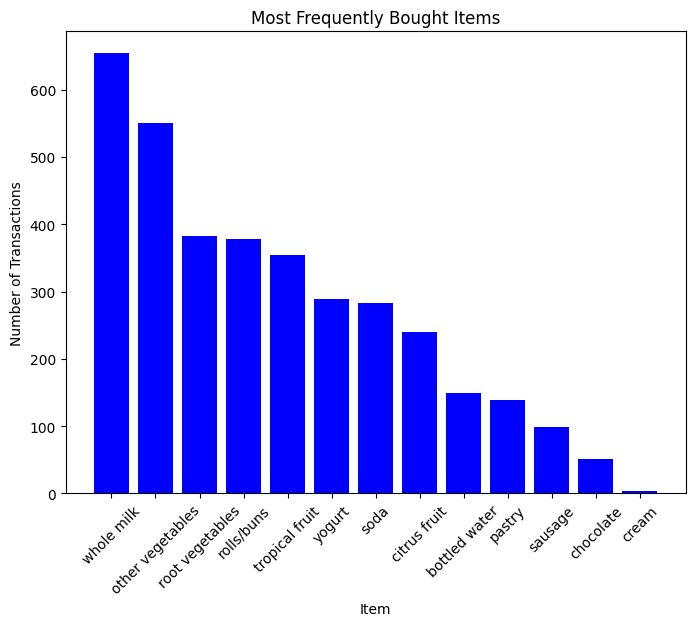

In [41]:
# Υπολογίζουμε τον αριθμό των αγορών που περιλαμβάνουν το κάθε προϊόν
counts = binary_ds.sum().sort_values(ascending=False)[:169]

# Δημιουργούμε το διάγραμμα αναλογιών
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts.values, color='blue')
ax.set_title('Most Frequently Bought Items')
ax.set_xlabel('Item')
ax.set_ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Τέλος, κάνουμε την διακριτοποίηση των τιμών της στήλης basket_value και οπτικοποιούμε τα αποτελέσματα σε δυο μορφές: ιστόγραμμα και πίτα.
Αρχικά, εμφανίζουμε πόσες τιμές περιέχει κάιε στήλη για να ελέγξουμε ότι ειναι περίπου ισοπληθείς. Μετά δημιουργούμε πρώτα ένα bar chart και στην συνέχεια ένα pie chart για την οπτικοποίηση.

low_value_basket       2572
high_value_basket      2505
medium_value_basket    2459
Name: basket_category, dtype: int64


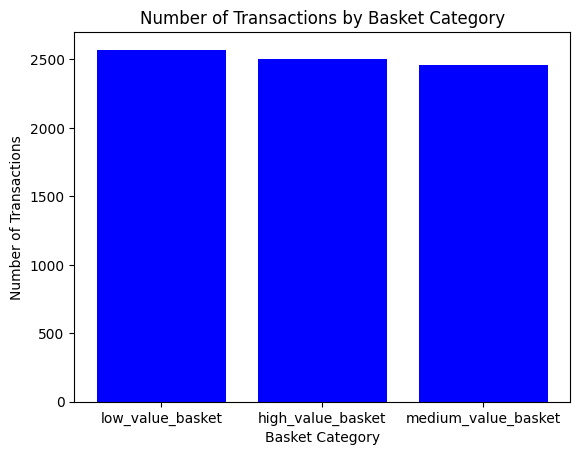

In [54]:
# Διακριτοποίηση της στήλης "basket_value" σε τρεις ισοπληθείς κατηγορίες
basket_value_bins = pd.qcut(ds['basket_value'], q=3, labels=['low_value_basket', 'medium_value_basket', 'high_value_basket'])
ds['basket_category'] = basket_value_bins

# Υπολογίζουμε τον αριθμό των αγορών που ανήκουν σε κάθε κατηγορία
counts = ds['basket_category'].value_counts()
print(counts)
# Δημιουργούμε το ιστόγραμμα
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, color='blue')
ax.set_title('Number of Transactions by Basket Category')
ax.set_xlabel('Basket Category')
ax.set_ylabel('Number of Transactions')
plt.show()

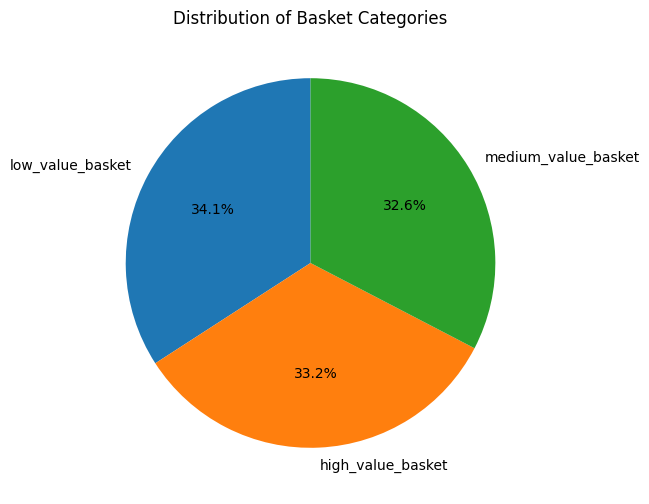

In [56]:
# Οπτικοποίηση ως pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Basket Categories')
plt.show()

**Συμπεράσματα:** 
<br>
Παρατηρούμε, 

**Άσκηση 2**

